Regression Project

In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df= pd.read_csv('insurance.csv')

In [23]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [24]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


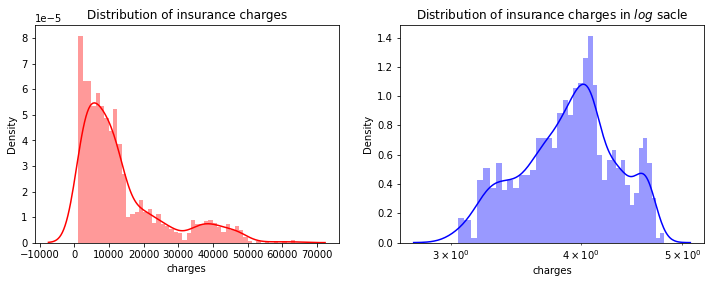

In [27]:
f= plt.figure(figsize=(12,4))
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')
plt.show()


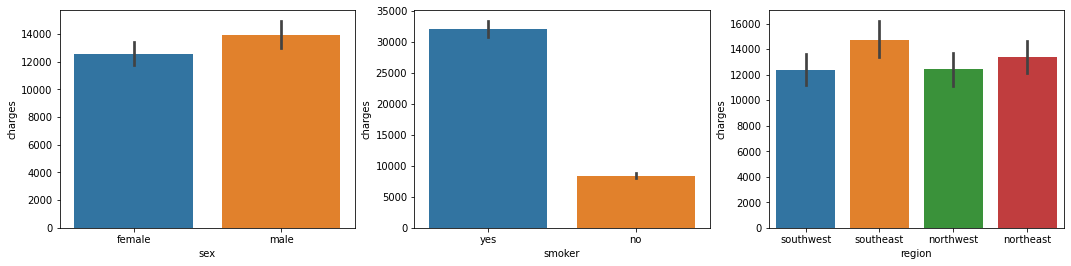

In [28]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='sex', y='charges', data=df)
plt.subplot(132)
sns.barplot(x='smoker', y='charges', data=df)
plt.subplot(133)
sns.barplot(x='region', y='charges', data=df)
plt.show()

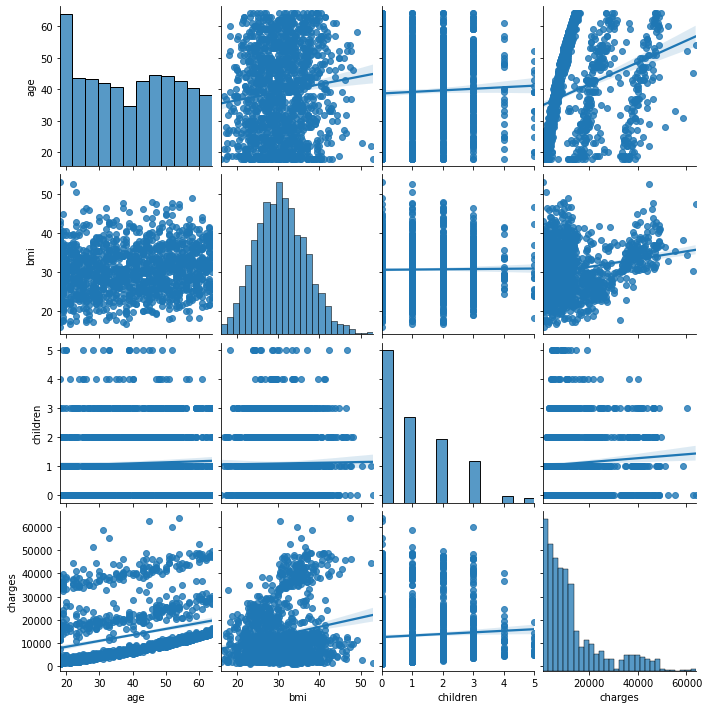

In [29]:
sns.pairplot(df,kind="reg")

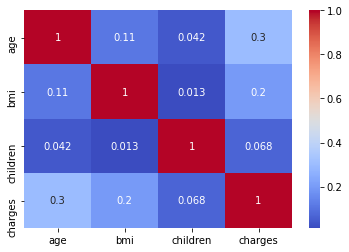

In [30]:
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)

In [31]:
df['sex']=df['sex'].map({'male':1, 'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [32]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [33]:
from sklearn.model_selection import train_test_split
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [34]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(lr.score(X_test,y_test))

0.7958786376014415


In [36]:
rfr = RandomForestRegressor(n_estimators = 100, random_state = 1)                              
rfr.fit(X_train,y_train)
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,rfr_train_pred),
mean_squared_error(y_test,rfr_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,rfr_train_pred),
r2_score(y_test,rfr_test_pred)))

MSE train data: 3756394.802, MSE test data: 20039019.390
R2 train data: 0.974, R2 test data: 0.873


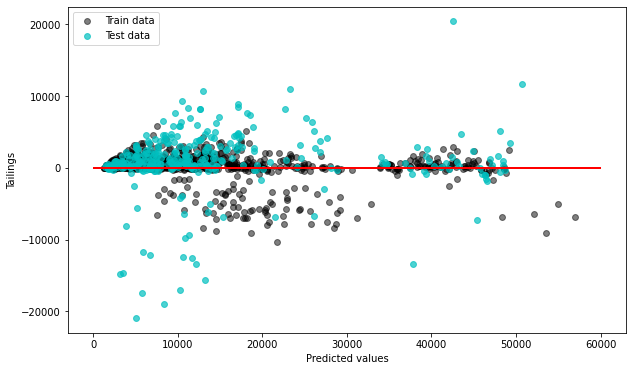

In [37]:
plt.figure(figsize=(10,6))

plt.scatter(rfr_train_pred,rfr_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(rfr_test_pred,rfr_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

In [38]:
from xgboost import XGBRegressor
regressor= XGBRegressor()
regressor.fit(X_train,y_train)

[10:16:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
y_train_predxg = regressor.predict(X_train)
y_test_predxg = regressor.predict(X_test)
print(regressor.score(X_test,y_test))

0.9001102795895979
